# 朴素贝叶斯分类
    
    - 朴素贝叶斯模型是一组非常简单快速的分类算法， 通常适用于维度非常高的数据集。 
    - 因为运行速度快， 而且可调参数少， 因此非常适合为分类问题提供快速粗糙的基本方案

## 1. 贝叶斯分类

    - 朴素贝叶斯分类器建立在贝叶斯分类方法的基础上
        - 其数学基础是贝叶斯定理（Bayes's theorem）：一个描述统计量条件概率关系的公式
    - 为每种标签设置生成模型是贝叶斯分类器训练过程的主要部分
    - 之所以称为“朴素”或“朴素贝叶斯”， 是因为如果对每种标签的生成模型进行非常简单的假设，就能找到每种类型生成模型的近似解，然后就可以使用贝叶斯分类。 不同类型的朴素贝叶斯分类器是由对数据的不同假设决定的

## 2. 高斯朴素贝叶斯

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

[[  0.92141506  -9.98499137]
 [ -5.26927614  -9.6186543 ]
 [ -0.45292089  -6.04316334]
 [ -0.0856312   -2.16867404]
 [  1.53194956  -0.36022153]
 [ -0.72443515  -7.44202457]
 [ -0.52577983 -11.34940749]
 [ -1.23044866  -0.02408431]
 [ -2.25997736  -8.21779094]
 [  0.77075118  -7.65464691]]
[0 0 0 1 1 0 0 1 0 0]


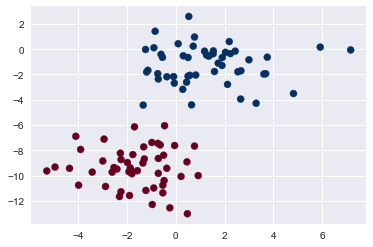

In [8]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(x[:, 0], x[0:, 1], c=y, s=50, cmap='RdBu')
print(x[:10])
print(y[:10])

[[ 1.68338905  8.87340859]
 [ 2.43868727  5.80789729]
 [-0.06883281  7.62609404]
 [ 0.12622096 12.05191401]
 [ 7.49127865  2.90194734]
 [ 5.08415053  5.52010856]
 [ 1.95262386 12.66073949]
 [-5.00549519 -2.43167261]
 [-5.71694244 10.98715722]
 [ 4.89419451 11.66021867]]
[1 1 1 1 1 1 1 1 1 1]


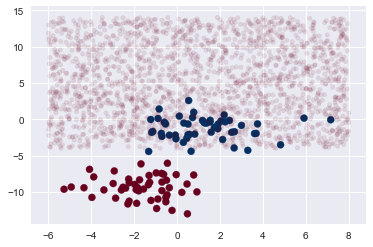

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y)

# 生成一些新数据来预测标签
rng = np.random.RandomState(0)
xtest = [-6, -4] + [14, 18] * rng.rand(2000, 2)
ytest = model.predict(xtest)
print(xtest[0:10])
print(ytest[0:10])

# 绘图
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(xtest[:, 0], xtest[:, 1], c=ytest, s=20, cmap='RdBu', alpha=0.1)

In [10]:
# 用predict_proba计算样本属于某个标签的概率
yprob = model.predict_proba(xtest)
print(yprob[-8:].round(2))

[[0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]]


## 3. 多项式朴素贝叶斯 

## 用多项式朴素贝叶斯进行文本分类

In [38]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names
# print(data)

# 只选择四类新闻，下载训练集和测试集
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])
# print(train.data[5].data)
print(train.target[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.

3


### 为了让这些数据能用于机器学习， 需要将每个字符串的内容转换成数值向量。 
### 可以创建一个管道， 将 TF–IDF 向量化方法（详情请参见 5.4 节）与多项式朴素贝叶斯分类器组合在一起

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(92.68, 0.5, 'predicted label')

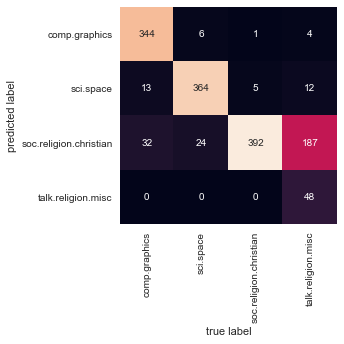

In [40]:
# 用混淆矩阵统计测试数据的真实标签与预测标签的结果
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [41]:
# 快速返回字符串预测结果的函数
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

# 测试模型预测效果
print(predict_category('sending a payload to the ISS'))
print(predict_category('discussing islam vs atheism'))
print(predict_category('determining the screen resolution'))

sci.space
soc.religion.christian
comp.graphics


## 4. 朴素贝叶斯的应用场景

    - 由于朴素贝叶斯分类器对数据有严格的假设， 因此它的训练效果通常比复杂模型的差。 其优点主要体现在以下四个方面
        - 训练和预测的速度非常快
        - 直接使用概率预测
        - 通常很容易解释
        - 可调参数（如果有的话） 非常少
    - 这些优点使得朴素贝叶斯分类器通常很适合作为分类的初始解，如果分类效果不够好，可以尝试更复杂的分类模型
    
    - 朴素贝叶斯分类器非常适合用于以下应用场景
        - 假设分布函数与数据匹配（实际中很少见）
        - 各种类型的区分度很高，模型复杂度不重要
        - 非常高维度的数据， 模型复杂度不重要
           - 后面两条看似不同，其实相关：随着数据集维度的增加，任何两点都不太可能逐渐靠近（毕竟它们得在每一个维度上都足够接近才行）
           - 随着数据维度不断增加，像朴素贝叶斯这样的简单分类器效果会和复杂分类器一样，甚至更好——只要你有足够的数据，简单的模型也可以非常强大